# #Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)
import os
import warnings
warnings.filterwarnings('ignore')

# import datasets

In [2]:
#list the files in the folder 
os.listdir()

['!DOCTYPE .html',
 '#lambda function is a small anonymous (n.py',
 '.anaconda',
 '.android',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.eclipse',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jdks',
 '.jupyter',
 '.m2',
 '.matplotlib',
 '.ms-ad',
 '.openjfx',
 '.p2',
 '.packettracer',
 '.redhat',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'archive',
 'archive.zip',
 'arithmetic.py',
 'bluej',
 'Cisco Packet Tracer 8.2.2',
 'Coffee Shop Sales.xlsx',
 'Coffeee Shop Sales.xlsx',
 'Contacts',
 'Cookies',
 'DATA ANALYTICS',
 'data.csv',
 'Desktop',
 'Documents',
 'Downloads',
 'dump.sql',
 'eclipse',
 'eclipse-workspace',
 'EDA On coffee shop sales.ipynb',
 'Favorites',
 'firstclass.java',
 'FOR YOU.html',
 'from abc import ABC, abstractmethod.txt',
 'git',
 'IdeaProjects',
 'IntelGraphicsProfiles',
 'INTRODUCTION PAGE.HTML',
 'jcalendar-tz-1.3.3-4.jar',
 'Links',
 'Local Settings',
 'MODEL OUTPUT',
 'MODEL usage.

In [3]:
#import dataset
df = pd.read_excel('Coffee shop sales.xlsx')

# Data Wrangling

In [4]:
#view the first five rows in the table
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# check the shape of the table
df.shape

(149116, 11)

In [6]:
#check for missing values
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check for datatypes
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [8]:
#check for summary statistics
numeric_col = df.select_dtypes(include='number')
numeric_col.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


# Feature Enginneering

In [9]:
# make a copy of the data
data = df.copy()

In [10]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# create new features

In [11]:
"""""creating a coloumn "transaction_timestamp" by combining
       transaction_date and transaction_time"""""

data['transaction_timestamp'] = data['transaction_date'].astype(str) + ' ' + data['transaction_time'].astype(str)


In [12]:
#converting  the transaction_time stamp to datetime datatype

data['transaction_timestamp'] = pd.to_datetime(data['transaction_timestamp'])

In [13]:
#confirm that column has  been created 
data.dtypes

transaction_id                    int64
transaction_date         datetime64[ns]
transaction_time                 object
transaction_qty                   int64
store_id                          int64
store_location                   object
product_id                        int64
unit_price                      float64
product_category                 object
product_type                     object
product_detail                   object
transaction_timestamp    datetime64[ns]
dtype: object

In [14]:
#convert transaction date column into datetime format 
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

#create a new column transaction_month 
data['transaction_month'] = data['transaction_date'].dt.month

In [15]:
#create a new column transaction_monthname
data['transaction_monthname'] = data['transaction_date'].dt.month_name()

# create a new column transcarion_day and transaction_dayname

In [16]:
#crteating transaction day column
data['day_of_week'] = data['transaction_date'].dt.day_of_week

In [17]:
#creating a transaction_dayname column
data['day'] = data['transaction_date'].dt.day_name()

In [18]:
#create a new column transaction_hour
data['transaction_hour'] = data['transaction_timestamp'].dt.hour


#create new column revenue (transaction qty * price)

In [19]:

# create a new column revenue  (transaction_qty * price)and Calculate revenue
data['revenue'] = data['transaction_qty'] * data['unit_price']



#confirm a new column by viewing  a sample of the table 
data.head()

In [20]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_timestamp,transaction_month,transaction_monthname,day_of_week,day,transaction_hour,revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,1,January,6,Sunday,7,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,1,January,6,Sunday,7,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,1,January,6,Sunday,7,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,1,January,6,Sunday,7,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,1,January,6,Sunday,7,6.2


# DATA EXPLORATION

In [21]:
#check earliest transaction date
data['transaction_timestamp'].min()

Timestamp('2023-01-01 07:06:11')

In [22]:
#check latest transaction date
data['transaction_timestamp'].max()

Timestamp('2023-06-30 20:57:19')

In [23]:
#check the unique transaction hours
data['transaction_hour'].value_counts().sort_index(ascending=True)

transaction_hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64

In [24]:
#check the unique transaction qunatity
data['transaction_qty'].value_counts()

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

In [25]:
#check the number of stores
data['store_id'].nunique()

3

In [26]:
data['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [27]:
#checking the number of unique product categories
data['product_category'].nunique()

9

In [28]:
#checking the number of products
data['product_type'].nunique()

29

# DATA ANALYSIS

# Calculating KPI's

# Total orders

In [29]:
#calculate total orders
total_orders = data['transaction_id'].count()
total_orders

149116

# Total sales

In [30]:
#calculated total sales
total_sales = data['transaction_qty'].sum()
total_sales


214470

# No of working days

In [31]:
#calculate  total days
no_of_days = (data['transaction_date'].max() - data['transaction_date'].min()).days
no_of_days

180

# Average order per day 


In [32]:
# Calculate the average order per day
avg_orders_per_day = total_orders/no_of_days 
avg_orders_per_day

828.4222222222222

# Total Rvenue

In [33]:
#calculate the total revenue
total_revenue = data['revenue'].sum()
total_revenue

698812.3300000002

# Average order analysis

In [34]:
# calculate average odrder value
aov = total_revenue/total_orders
aov

4.686367190643527

# Order Analysis 

# Hourly orders 


In [35]:
#find the total orders by transaction hour 
hourly_orders = data.groupby(['transaction_hour'],as_index=False).agg(total_orders=('transaction_id', 'count'))
hourly_orders

,transaction_hour,total_orders
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


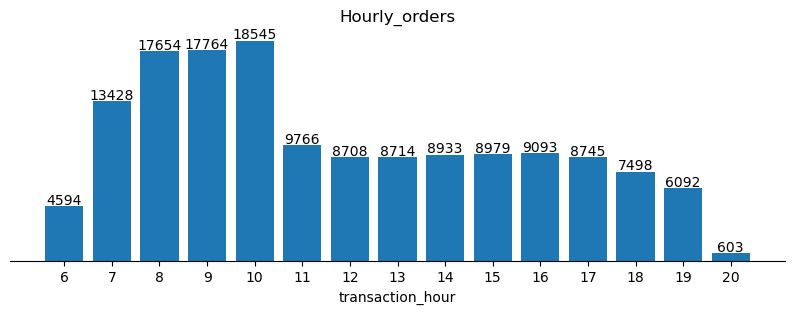

In [36]:
#plot a chart of hourly orders 
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(x=hourly_orders['transaction_hour'].astype(str),
     height=hourly_orders ['total_orders'])

#add title
ax.set_title('Hourly_orders')

#add x-axis lable
ax.set_xlabel('transaction_hour')

#remove spines
ax.spines[['top', 'right', 'left']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

# add data lable
for index,values in enumerate(hourly_orders['total_orders']):
    ax.annotate(values, xy=(index, values+500),ha ='center' , va='center')
                
plt.show()


# Orders by day of week 

In [37]:
# calculate orders by the day of the week
data.groupby(['day_of_week','day'] , as_index = False).agg(
total_orders = ('transaction_id', 'count'))

,day_of_week,day,total_orders
0,0,Monday,21643
1,1,Tuesday,21202
2,2,Wednesday,21310
3,3,Thursday,21654
4,4,Friday,21701
5,5,Saturday,20510
6,6,Sunday,21096


In [ ]:
# plot a bar chart of the order by day of thec week 

# orders by Day of week and hour 

In [39]:
#plot a heat map of the orders by day of week and transaction hour
day_hour_orders=data.pivot_table(
 index='day_of_week',
 columns='transaction_hour',
 values = 'transaction_id',
 aggfunc='count'
                )
day_hour_orders

transaction_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day_of_week,,,,,,,,,,,,,,,
0,661,1992,2482,2494,2612,1478,1308,1267,1376,1319,1355,1302,1077,846,74
1,489,1846,2783,2753,2846,1301,1126,1152,1224,1254,1227,1232,957,872,140
2,698,1873,2540,2527,2596,1468,1226,1311,1257,1270,1272,1235,1118,836,83
3,731,1959,2389,2375,2570,1470,1307,1317,1341,1323,1406,1311,1125,970,60
4,707,1989,2544,2707,2761,1405,1231,1199,1265,1295,1257,1226,1149,886,80
5,592,1877,2438,2345,2551,1307,1279,1187,1226,1287,1287,1178,1019,846,91
6,716,1892,2478,2563,2609,1337,1231,1281,1244,1231,1289,1261,1053,836,75


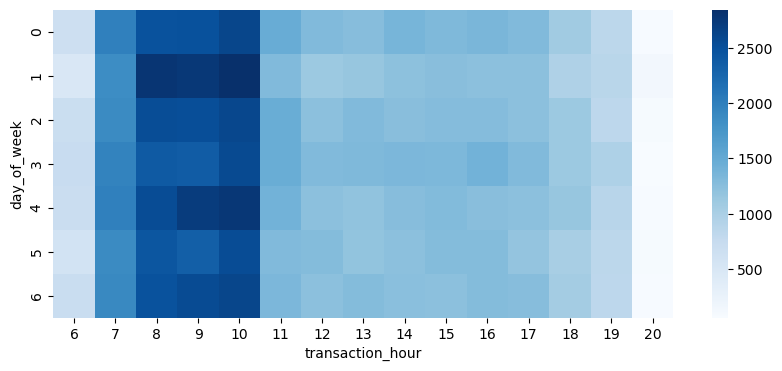

In [41]:
#ploting a heat map 
fig,ax = plt.subplots(figsize=[10,4])

sns.heatmap(day_hour_orders,cmap='Blues')

plt.show()

# Monthly orders

In [43]:
# calculate orders by month 
monthly_orders=data.groupby(['transaction_month', 'transaction_monthname' ], as_index=False).agg(
 total_orders=('transaction_id', 'count'))
monthly_orders

,transaction_month,transaction_monthname,total_orders
0,1,January,17314
1,2,February,16359
2,3,March,21229
3,4,April,25335
4,5,May,33527
5,6,June,35352


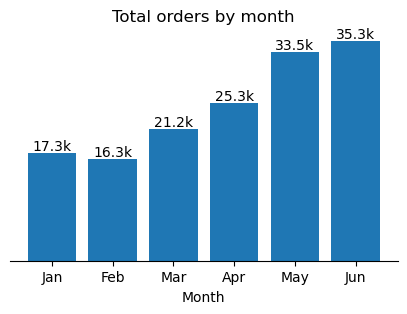

In [44]:
# plot a bar chart of monthly orders
fig, ax = plt.subplots(figsize=(5, 3))

ax.bar(x=monthly_orders['transaction_monthname'].str[0:3],height=monthly_orders ['total_orders'])

#remove borders
ax.spines[['top', 'right', 'left']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

#add y-lable and x-lable
ax.set_xlabel('Month')

#add title
ax.set_title('Total orders by month')

# add data annotaion
for index,values in enumerate(monthly_orders['total_orders']):
    ax.annotate(str(values/1000)[0:4]+'k', xy=(index, values+1000),ha ='center' , va='center')
                
plt.show()



# Orders by store

In [47]:
#claculate the orders by store
store_orders = data.groupby(['store_id','store_location'], as_index=False).agg(
 total_orders=('transaction_id','count')).sort_values(
   'total_orders', ascending=False)
store_orders

,store_id,store_location,total_orders
2,8,Hell's Kitchen,50735
0,3,Astoria,50599
1,5,Lower Manhattan,47782


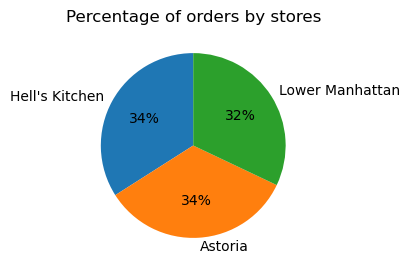

In [49]:
# plot a pie chart of orders by stores 
fig,ax  = plt.subplots(figsize=[5,3])

ax.pie(store_orders['total_orders'],autopct='%.0f%%',startangle=90, labels=store_orders['store_location'])

#add title
ax.set_title('Percentage of orders by stores')
plt.show()

# orders by product category


In [51]:
# calculate the orders by product category
data.groupby(['product_category'],as_index= False).agg(
  total_orders = ('transaction_id', 'count')).sort_values(
  'total_orders', ascending=False)

,product_category,total_orders
2,Coffee,58416
8,Tea,45449
0,Bakery,22796
4,Drinking Chocolate,11468
5,Flavours,6790
3,Coffee beans,1753
6,Loose Tea,1210
1,Branded,747
7,Packaged Chocolate,487


# Top 10 products by orders  

In [54]:
# calculate the top 10 products by orders 
data.groupby(['product_type'], as_index= False).agg(
  total_orders = ('transaction_id','count')).sort_values(
  'total_orders', ascending=False).head(10)

,product_type,total_orders
4,Brewed Chai tea,17183
13,Gourmet brewed coffee,16912
0,Barista Espresso,16403
17,Hot chocolate,11468
3,Brewed Black tea,11350
6,Brewed herbal tea,11245
27,Scone,10173
22,Organic brewed coffee,8489
10,Drip coffee,8477
25,Premium brewed coffee,8135


# REVENUE ANALYSIS

In [56]:
#calculate revenue by months
data.groupby(['transaction_month','transaction_monthname'], as_index=False).agg(
   total_revenue=('revenue','sum'))

,transaction_month,transaction_monthname,total_revenue
0,1,January,81677.74
1,2,February,76145.19
2,3,March,98834.68
3,4,April,118941.08
4,5,May,156727.76
5,6,June,166485.88


# Rvenue by product category

In [58]:
# calculate revenue by product category 
data.groupby(['product_category'], as_index=False).agg(
   total_revenue=('revenue','sum')).sort_values(
 'total_revenue', ascending=False)

,product_category,total_revenue
2,Coffee,269952.45
8,Tea,196405.95
0,Bakery,82315.64
4,Drinking Chocolate,72416.00
3,Coffee beans,40085.25
1,Branded,13607.00
6,Loose Tea,11213.60
5,Flavours,8408.80
7,Packaged Chocolate,4407.64


# Top 10 product by  revenue 

In [59]:
# Top 10 product  revenue generating products 
data.groupby(['product_type'], as_index=False).agg(
   total_revenue=('revenue','sum')).sort_values(
 'total_revenue', ascending=False).head(10)

,product_type,total_revenue
0,Barista Espresso,91406.20
4,Brewed Chai tea,77081.95
17,Hot chocolate,72416.00
13,Gourmet brewed coffee,70034.60
3,Brewed Black tea,47932.00
6,Brewed herbal tea,47539.50
25,Premium brewed coffee,38781.15
22,Organic brewed coffee,37746.50
27,Scone,36866.12
10,Drip coffee,31984.00


# DATA COMMUNICATION